<h3> Importing necessary Libraries

In [15]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [20]:
import numpy as np

<h3> Data Extraction

In [41]:
Nikkei = yf.Ticker("^N225")

In [52]:
df=Nikkei.history(start="2010-01-01",  end="2019-09-30")
df.drop(['Volume','Dividends','Stock Splits','Open','High','Low'],axis=1,inplace=True)
df

,Close
Date,
2010-01-04,10654.790039
2010-01-05,10681.830078
2010-01-06,10731.450195
2010-01-07,10681.660156
2010-01-08,10798.320312
...,...
2019-09-20,22079.089844
2019-09-24,22098.839844
2019-09-25,22020.150391


In [43]:
others = yf.download("^DJI ^GDAXI ^GSPC", start="2010-01-01", end="2019-09-30")
others['Close']

[*********************100%***********************]  3 of 3 completed


,^DJI,^GDAXI,^GSPC
Date,,,
2009-12-31,10428.049805,NaN,1115.099976
2010-01-04,10583.959961,6048.299805,1132.989990
2010-01-05,10572.019531,6031.859863,1136.520020
2010-01-06,10573.679688,6034.330078,1137.140015
2010-01-07,10606.860352,6019.359863,1141.689941
...,...,...,...
2019-09-23,26949.990234,12342.330078,2991.780029
2019-09-24,26807.769531,12307.150391,2966.600098
2019-09-25,26970.710938,12234.179688,2984.870117


<h3> Data Visualization

<AxesSubplot:xlabel='Date'>

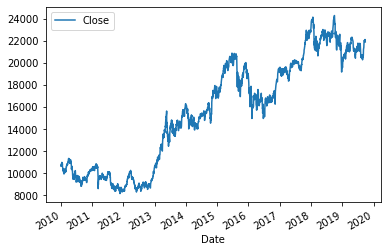

In [53]:
df.plot()

<h3> Data Preprocessing

In [54]:
length = len(df)
length

2385

In [55]:
train = df.iloc[:length - 150]
test = df.iloc[length - 150:]

In [33]:
len(train)

2235

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [50]:
train= train.reshape(-1,1)

AttributeError: 'Series' object has no attribute 'reshape'

In [57]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [58]:
scaled_train[:10]

array([[0.15485325],
       [0.15653165],
       [0.15961162],
       [0.15652111],
       [0.16376231],
       [0.16877884],
       [0.15983384],
       [0.17055034],
       [0.17516965],
       [0.16728544]])

In [60]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [61]:
n_input = 250
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [62]:


X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')
     


Given the Array: 
[0.15485325 0.15653165 0.15961162 0.15652111 0.16376231 0.16877884
 0.15983384 0.17055034 0.17516965 0.16728544 0.1616879  0.15998835
 0.16811285 0.1508658  0.146033   0.13440029 0.12985668 0.1399252
 0.12650237 0.12693559 0.13724373 0.13930698 0.13630587 0.11775347
 0.11121929 0.11004491 0.11197469 0.11993219 0.11503538 0.11633578
 0.13325507 0.13504645 0.12188057 0.13906736 0.13606499 0.12655141
 0.12053859 0.12203266 0.12488974 0.12797965 0.12992245 0.1232548
 0.13711152 0.15057842 0.14944442 0.14921286 0.1554839  0.16084122
 0.16088595 0.15900703 0.16678269 0.16039247 0.16540094 0.16226206
 0.16479951 0.16565729 0.17605544 0.17544091 0.18231029 0.18186343
 0.1914509  0.1940386  0.19734139 0.19380462 0.19445697 0.18672108
 0.1889643  0.19191643 0.18628847 0.1889991  0.19327514 0.18262313
 0.17061799 0.17011584 0.18187022 0.17312071 0.1709712  0.18657148
 0.18948075 0.1716124  0.17984364 0.15739198 0.13684027 0.14715089
 0.13972717 0.13866766 0.15272793 0.14291824 0

In [63]:
X.shape

(1, 250, 1)

In [64]:


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
     


In [72]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 512)               1052672   
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 1,053,185
Trainable params: 1,053,185
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.fit(generator,epochs=30)

Epoch 1/30
 317/1985 [===>..........................] - ETA: 1:03 - loss: 0.0179

KeyboardInterrupt: 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
time_steps = 5
X_train = np.reshape(X_train, (X_train.shape[0], time_steps, X_train.shape[1] // time_steps))
X_test = np.reshape(X_test, (X_test.shape[0], time_steps, X_test.shape[1] // time_steps))


IndexError: tuple index out of range